# Visualization of Literature Data
Tyler Biggs

In [1]:
# Import basic packages
import pandas as pd
import numpy as np
import json
import os

In [4]:
# import bokeh plotting package
import bokeh
from bokeh.io import output_notebook

In [5]:
# Load the json metadata file
file_path = 'data/nmr_metadata.json'
with open(file_path, 'r') as f:
    metadata = json.load(f)

In [7]:
# for s in metadata['studies']:
# #     print('\n')
# #     print(s['assays'])
#     print('\n')
#     print(s['publications'])
#     for d in s['publications']:
#         print(d['doi'])
# #     for d in s['assays']:
# #         for f in d['dataFiles']:
# #             print('\n')
# #             print(f['name'])

In [9]:
def get_publication_title():
    pass

def get_publication_doi():
    doi_list = []
    for s in metadata['studies']:
        for d in s['publications']:
            doi_list.append(d['doi'])
    return doi_list
            
def get_file_paths(json_path):
    paths = []
    with open(json_path, 'r') as f:
        metadata = json.load(f)
        
    for s in metadata['studies']:
        for d in s['assays']:
            for f in d['dataFiles']:
                paths.append(f['name'])
    #             print(f['name'])
    return paths

In [10]:
def generate_pd_frames(csv):
    return pd.read_csv(csv)

In [11]:
def create_dataframes(json_metadata_path):
    """Construct dataframes with the needed metadata attached."""
    # Read the metadata json file constructed by ISASetup.py
    with open(json_metadata_path, 'r') as f:
        metadata = json.load(f)
    # create a dataframes for each csv found
    dataFrame_list = []
    for study in metadata['studies']:
        # Store the doi/link
        for publication in study['publications']:
            doi = publication['doi'] # This is buggy, just picks the last one. They should all be the same the way I implemented it.
        for assay in study['assays']:
            for filename in assay['dataFiles']:
                df = pd.read_csv(filename['name'])
                df['doi'] = doi
                dataFrame_list.append(df)
    return pd.concat(dataFrame_list)

In [12]:
result = create_dataframes('data/nmr_metadata.json')


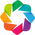

In [15]:
import holoviews as hv
hv.extension('bokeh')
from holoviews.operation import gridmatrix
from bokeh.layouts import row, widgetbox
from bokeh.models import Select
from bokeh.plotting import curdoc

In [18]:
ds = hv.Dataset(result)
ds

:Dataset   [ Al_ppm, CI_concentration, OH_concentration, counter_ion, temperature, wavelength,Al_concentration,doi]

In [75]:
grouped_by_ci = ds.groupby('counter_ion', container_type=hv.NdOverlay)
grid = gridmatrix(grouped_by_ci, diagonal_type=hv.Scatter)
plot_opts = dict(tools=['hover', 'box_select'], bgcolor='#efe8e2')
style = dict(fill_alpha=0.2, size=4)

grid({'Scatter': {'plot': plot_opts, 'style': style}})

:GridMatrix   [X,Y]
   :NdOverlay   [doi]
      :Scatter   [Al_concentration]   (Al_concentration)

In [78]:
renderer = hv.renderer('matplotlib').instance(fig='svg', holomap='gif')
renderer.save(grid, 'example_I', style=dict(Image={'cmap':'jet'}))

In [20]:
points = hv.Points(result['Al_ppm'])

KeyError: 'Al_ppm'